# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('data/human_body_temperature.csv')

### Question 1: Is the distribution of body temperatures normal?

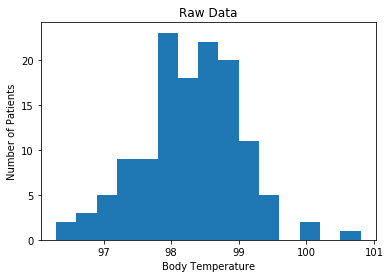

In [2]:
# A historgram of the data
body_temps = df.temperature
plt.hist(body_temps, bins=15)
plt.title("Raw Data")
plt.xlabel("Body Temperature")
plt.ylabel("Number of Patients")
plt.show()

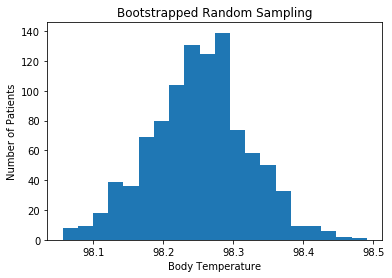

In [3]:
# Bootstrapping the data to see if it is normally distributed

# Creating 1000 samples; each sample is generated from 100 random draws taken from the original dataset
boot_temps = []
for x in range(1000):
    sample = np.random.choice(df.temperature, size=100)
    boot_temps.append(np.average(sample))

plt.hist(boot_temps, bins=20)
plt.title("Bootstrapped Random Sampling")
plt.xlabel("Body Temperature")
plt.ylabel("Number of Patients")
plt.show()

Question 1 Answer: After bootsrapping the data, it appears that it roughly approximates a normal distrubution, albiet not perfectly. 

Make a quantile plot 
- Quantile plots: how many data points are in each 

### Question 2: Is the sample size large? Are the observations independent?

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Question 2 Answer: The sample size (n=130) is not large relative to the human population, but for the purpose of deriving statistical inferences, it is sized appropriately. We can also assume that the observations are independent since each patient was tested only once (not a paired test).

### Question 3: Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  t or  z statistic?
* Now try using the other test. How is the result be different? Why?

In [5]:
# Calculating the mean of the sample population
temp_mean = df.temperature.mean()

# Calculating the Z-statistic
temp_std = df.temperature.std()
z_stat = ((temp_mean-98.6)/(temp_std/np.sqrt(130)))

# Calculating the T-statistic
t_stat = ((temp_mean-98.6)/(temp_std/np.sqrt(130)))

In [6]:
# is the T-stat equal to the Z-stat?
t_stat == z_stat

True

In [7]:
# Sample population temperature mean
temp_mean

98.24923076923078

Question 3 Answer: It is extremely unlikely that the population mean is 98.6ºF. Based on our T-statistic value of (-5.4548232923640789), we reject the null hypothesis (the true population temperature mean is 98.6ºF). Although not up to scientific standards, we can also see that the average body temp converges to approximately ~98.25ºF in the bootstrapped historgram, which is supported by the mean of the sample dataset.  

* Since we are drawing from one sample group, we would use a one-sample test. 
* In our situation we would use the T-statistic. As a matter of practice, it is best to use the T-statistic since it is usually not possible to obtain the true population standard devation (we rarely know with 100% certainty the true population standard deviation and therefore cannot use the Z-statistic). The T-statistic converges to normal when the sample size is large enough for the Central Limit Theorm to apply and thus "becomes" the Z-statistic. 
* The Z-statistic and T-statistic scores are identical values (-5.4548232923640789). The Z / T Statistic shows that we are many standard devations away from the mean and well outside the the 95% confidence interval (-1.96/1.96 STDs), thus it is highly unlikely that it is the result of chance.
* T-statistic vs Z-statistic equations: 
    * $Z-statistic:\frac{\overline{X} - \mu_\overline{X}}{\frac{\sigma}{\sqrt{n}}}$
        * $\overline{X}$ - the sample mean
        * $\mu_\overline{X}$ - mean of the sampling distribution (which we assume to be 98.6)
        * $\sigma_\overline{x} = $$\frac{\sigma}{\sqrt{n}}$ - the standard error (the standard devation of the sample population)
        
    * $T-statistic: \frac{\overline{X} - \mu_\overline{X}}{\frac{S}{\sqrt{n}}}$
        * $\overline{X}$ - the sample mean
        * $\mu_\overline{X}$ - mean of the sampling distribution (which we assume to be 98.6)
        * $S$ - sample standard deviation
        * $\sqrt{n}$ - sample size

### Question 4: At what temperature should we consider someone's temperature to be "abnormal"?

In [8]:
# Computing a 95% confidence interval 

# This is the standard error 
se = temp_std/(np.sqrt(130))

# We can be 95% confident that the actual mean body temp lies between 98.1231941122 & 98.3752674262
lower = (temp_mean) - (1.96)*(se)
upper = temp_mean + (1.96)*(se)
print("lower bound: ", lower)
print("upper bound: ", upper)

lower bound:  98.1231941122
upper bound:  98.3752674262


Question 4 Answer: An abnormal temperature would fall outside of the 95% confidence interval [98.1231941122, 98.3752674262] (meaning you have a statistically significant lower/higher body temperature).  

### Question 5: Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [9]:
# Isolate females and males
female = df[df.gender == 'F']
male = df[df.gender == 'M']

# Find their temperature attributes
female_temp = female.temperature
male_temp = male.temperature

# Calculate the difference of the means
diff_mean = female_temp.mean() - male_temp.mean()

# Find the variance between male and female populations
variance = (female_temp.var() / len(female)) + (female_temp.var() / len(male))

# Find the standard deviation from the variance
stdvar = np.sqrt(variance)

# Calculate the 95% confidence interval using z-score values of -1.96/1.96 
lower = -1.96 * stdvar
upper = 1.96 * stdvar

print("This is the 95% confidence interval: ", [lower, upper])
print("The difference of the means is: ", diff_mean)

This is the 95% confidence interval:  [-0.25561610314952576, 0.25561610314952576]
The difference of the means is:  0.289230769230727


Question 5 Answer: Yes, there is a significant difference between normal body temperatures in females and males. The 95% CI (97.5% on a one-tailed test) shows that the threshold value is ~0.256 in the positive direction. Since the difference of the means (~0.289) is well into the critical region, we can conclude that the difference is likely not due to chance. 

* I used a significance test with a confidence interval of 95% to check if the difference of the means in body temperature between males and females is statistically significant.
* By analyzing the body temperature data, we can see that it is highly unlikely that the average body temperature is 98.6ºF. We can be 95% confident that the actual average body temperature falls somewhere between 98.1231941122ºF and 98.3752674262ºF

independent t-test 